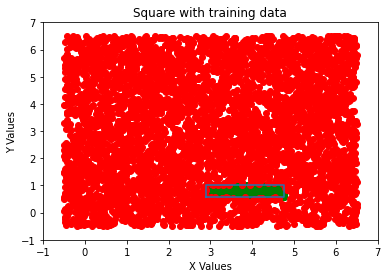

Accuracy on test set:  0.98


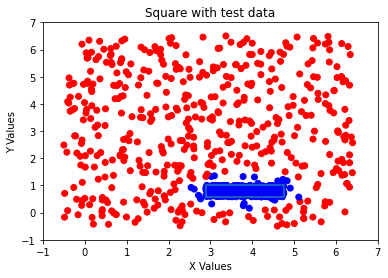

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn import svm
#np.random.seed(85)

def test_plot_square_scatter(cube_x_vals,cube_y_vals, xdata, preds):
  plt.plot(cube_x_vals,cube_y_vals)
  plt.xlabel("X Values")
  plt.xlim(-1,7)
  plt.ylabel("Y Values")
  plt.ylim(-1,7)
  plt.title("Square with test data")
  plt.scatter(xdata[:,0],xdata[:,1],c=preds,marker="o", cmap="bwr_r")
  plt.show()

# 
def plot_square_scatter(cube_x_vals,cube_y_vals, xdata, ydata, badx, bady):
  plt.plot(cube_x_vals,cube_y_vals)
  plt.xlabel("X Values")
  plt.xlim(-1,7)
  plt.ylabel("Y Values")
  plt.ylim(-1,7)
  plt.title("Square with training data")
  plt.scatter(xdata,ydata, color='green')
  plt.scatter(badx,bady, color='red')
  plt.show()

def plot_square(cube_x_vals,cube_y_vals):
  plt.plot(cube_x_vals,cube_y_vals)
  plt.xlabel("X Values")
  plt.xlim(-1,7)
  plt.ylabel("Y Values")
  plt.ylim(-1,7)
  plt.title("Initial Square") 
  plt.show()

x = start_point_x = 4 * np.random.rand() #np.random.randint(5)
y = start_point_y = 4 * np.random.rand() #np.random.randint(5)
rand_val_1 = np.random.rand() * 2.5
rand_val_2 = np.random.rand() * 2.5
up_left_point_x = x
up_left_point_y = y + rand_val_2
up_right_point_x = x + rand_val_1
up_right_point_y = y + rand_val_2
low_right_point_x = x + rand_val_1
low_right_point_y = y

cube_x_vals = np.array([start_point_x, up_left_point_x, up_right_point_x, low_right_point_x, start_point_x])
cube_y_vals = np.array([start_point_y, up_left_point_y, up_right_point_y, low_right_point_y, start_point_y])

# plot_square(cube_x_vals,cube_y_vals)
xdata = rand_val_1 * np.random.rand(5000) + (start_point_x)
ydata = rand_val_2 * np.random.rand(5000) + (start_point_y)

# generate initial bad training data
bad_ydata = 7 * np.random.rand(5000) - 0.5
bad_xdata = 7 * np.random.rand(5000) - 0.5

# calculate box bounds
x_range_min = start_point_x
x_range_max = start_point_x + rand_val_1
y_range_min = start_point_y
y_range_max = start_point_y + rand_val_2

# remove what would be valid points (in the box) from the bad training data 
bad_xdata1 = list()
bad_ydata1 = list()
for xi, yi in zip(bad_xdata, bad_ydata):
  if not x_range_min < xi < x_range_max or not  y_range_min < yi < y_range_max:
    bad_xdata1.append(xi)
    bad_ydata1.append(yi)
bad_xdata = np.array(bad_xdata1)
bad_ydata = np.array(bad_ydata1)

# plot all data
plot_square_scatter(cube_x_vals,cube_y_vals, xdata, ydata, bad_xdata, bad_ydata)

bad_train_data = np.column_stack((bad_xdata , bad_ydata ))
good_train_data = np.column_stack((xdata , ydata ))

bad_labels = np.zeros((bad_train_data.shape[0], 1))
good_labels = np.ones((good_train_data.shape[0], 1))

good_train_data = np.concatenate((good_labels, good_train_data), axis=1)
bad_train_data = np.concatenate((bad_labels, bad_train_data), axis=1)
train_data = np.append(bad_train_data,good_train_data, axis=0)
np.random.shuffle(train_data)
# print(train_data)
test_data = train_data[:1000]
train_data = train_data[1000:]


clf = SGDClassifier(loss="hinge", penalty="l2")
clf = svm.SVC()
clf.fit(train_data[:,1:], train_data[:,0])

print("Accuracy on test set: ", clf.score(test_data[:,1:], test_data[:,0]))
predictions = clf.predict(test_data[:,1:])
test_plot_square_scatter(cube_x_vals,cube_y_vals, test_data[:,1:], predictions)